# ROS 

### AMCL

For localization of the robot, the ROS package of AMCL (Adaptive Monte Carlo Localization) works well. It is straightforward to run the AMCL ROS package. AMCL can not handle a laser which moves relative to the base and works only with laser scans and laser maps. The only thing which should be taken care of is that it requires an odometry message. There are different ways to generate this odometry message. The odometry data can be taken from wheel encoders, IMUs, etc.. which can be used to generate the odometry message which can be supplied to AMCL. Another neat trick is to use pose obtained from the Hector mapping to generate an odometry message which can be then supplied to AMCL. If Hector mapping pose is used to generate odometry message, then no external odometry is required and the result is pretty accurate.

### Robot Localization

Robot Localization (robot_localization) is a useful package to fuse information from arbitrary number of sensors using the Extended Kalman Filter (EKF) or the Unscented Kalman Filter (UKF). Different from AMCL above, it does not require a map to start working. In projects related to autonomous driving, a map is usually unknown beforehand, in which case the common approach is to localize the robot using its onboard sensors, such as the most prevalent ones, IMU and wheel encoder.

### Navigation process

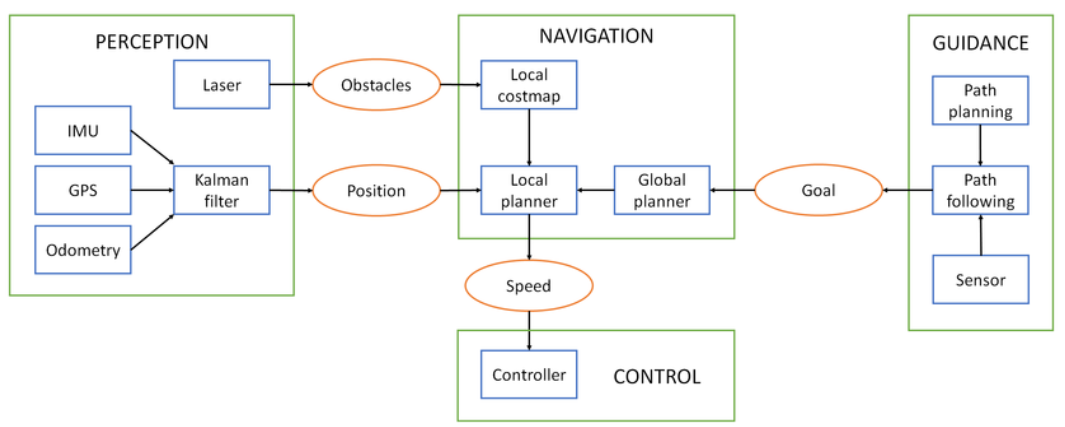

### Stop all the files you run

### Start the map provider with the map you saved

In [ ]:
rosrun map_server map_server my_map.yaml

### Create a new package named my_localizer_launcher

In [ ]:
cd ~/demo_ws/src
catkin_create_pkg my_localizer_launcher
cd my_localizer_launcher
mkdir src
cd src

### Inside this package create a directory named launch

In [ ]:
mkdir launch

### Ιnside this directory create a file named my_localizer.launch

In [ ]:
cd launch
touch named my_localizer.launch

#### my_localizer.launch

In [ ]:
<launch>
  <arg name="use_map_topic"   default="false"/>
  <arg name="scan_topic"      default="kobuki/laser/scan"/> 
  <arg name="initial_pose_x"  default="0.0"/>
  <arg name="initial_pose_y"  default="0.0"/>
  <arg name="initial_pose_a"  default="0.0"/>
  <arg name="odom_frame_id"   default="odom"/>
  <arg name="base_frame_id"   default="base_footprint"/>
  <arg name="global_frame_id" default="map"/>

  <node pkg="amcl" type="amcl" name="amcl">
    <param name="use_map_topic"             value="$(arg use_map_topic)"/>
    <!-- Publish scans from best pose at a max of 10 Hz -->
    <param name="odom_model_type"           value="diff"/>
    <param name="odom_alpha5"               value="0.1"/>
    <param name="gui_publish_rate"          value="10.0"/>
    <param name="laser_max_beams"             value="60"/>
    <param name="laser_max_range"           value="12.0"/>
    <param name="min_particles"             value="500"/>
    <param name="max_particles"             value="2000"/>
    <param name="kld_err"                   value="0.05"/>
    <param name="kld_z"                     value="0.99"/>
    <param name="odom_alpha1"               value="0.2"/>
    <param name="odom_alpha2"               value="0.2"/>
    <!-- translation std dev, m -->
    <param name="odom_alpha3"               value="0.2"/>
    <param name="odom_alpha4"               value="0.2"/>
    <param name="laser_z_hit"               value="0.5"/>
    <param name="laser_z_short"             value="0.05"/>
    <param name="laser_z_max"               value="0.05"/>
    <param name="laser_z_rand"              value="0.5"/>
    <param name="laser_sigma_hit"           value="0.2"/>
    <param name="laser_lambda_short"        value="0.1"/>
    <param name="laser_model_type"          value="likelihood_field"/>
    <!-- <param name="laser_model_type" value="beam"/> -->
    <param name="laser_likelihood_max_dist" value="2.0"/>
    <param name="update_min_d"              value="0.25"/>
    <param name="update_min_a"              value="0.2"/>
    <param name="odom_frame_id"             value="$(arg odom_frame_id)"/> 
    <param name="base_frame_id"             value="$(arg base_frame_id)"/> 
    <param name="global_frame_id"           value="$(arg global_frame_id)"/>
    <param name="resample_interval"         value="1"/>
    <!-- Increase tolerance because the computer can get quite busy -->
    <param name="transform_tolerance"       value="1.0"/>
    <param name="recovery_alpha_slow"       value="0.0"/>
    <param name="recovery_alpha_fast"       value="0.0"/>
    <param name="initial_pose_x"            value="$(arg initial_pose_x)"/>
    <param name="initial_pose_y"            value="$(arg initial_pose_y)"/>
    <param name="initial_pose_a"            value="$(arg initial_pose_a)"/>
    <remap from="scan"                      to="$(arg scan_topic)"/>
  </node>
</launch>

### Launch the file to start the localization code

In [ ]:
roslaunch my_localizer_launcher my_localizer.launch

### Launch the Rviz to see how the robot localizes

#### With 2D Pose Estimate array correct the position of the robot in order to match with its true position

In [ ]:
rosrun rviz rviz

### Stop all the files you run

### Let's launch the map server and the localization
### First thing we need to do is to launch the map server and the localization system

In [ ]:
cd demo_ws/src/my_mapping_launcher/src/
rosrun map_server map_server my_map.yaml
roslaunch my_localizer_launcher my_localizer.launch

### Launch the Rviz to localize the robot in the map

In [ ]:
rosrun rviz rviz

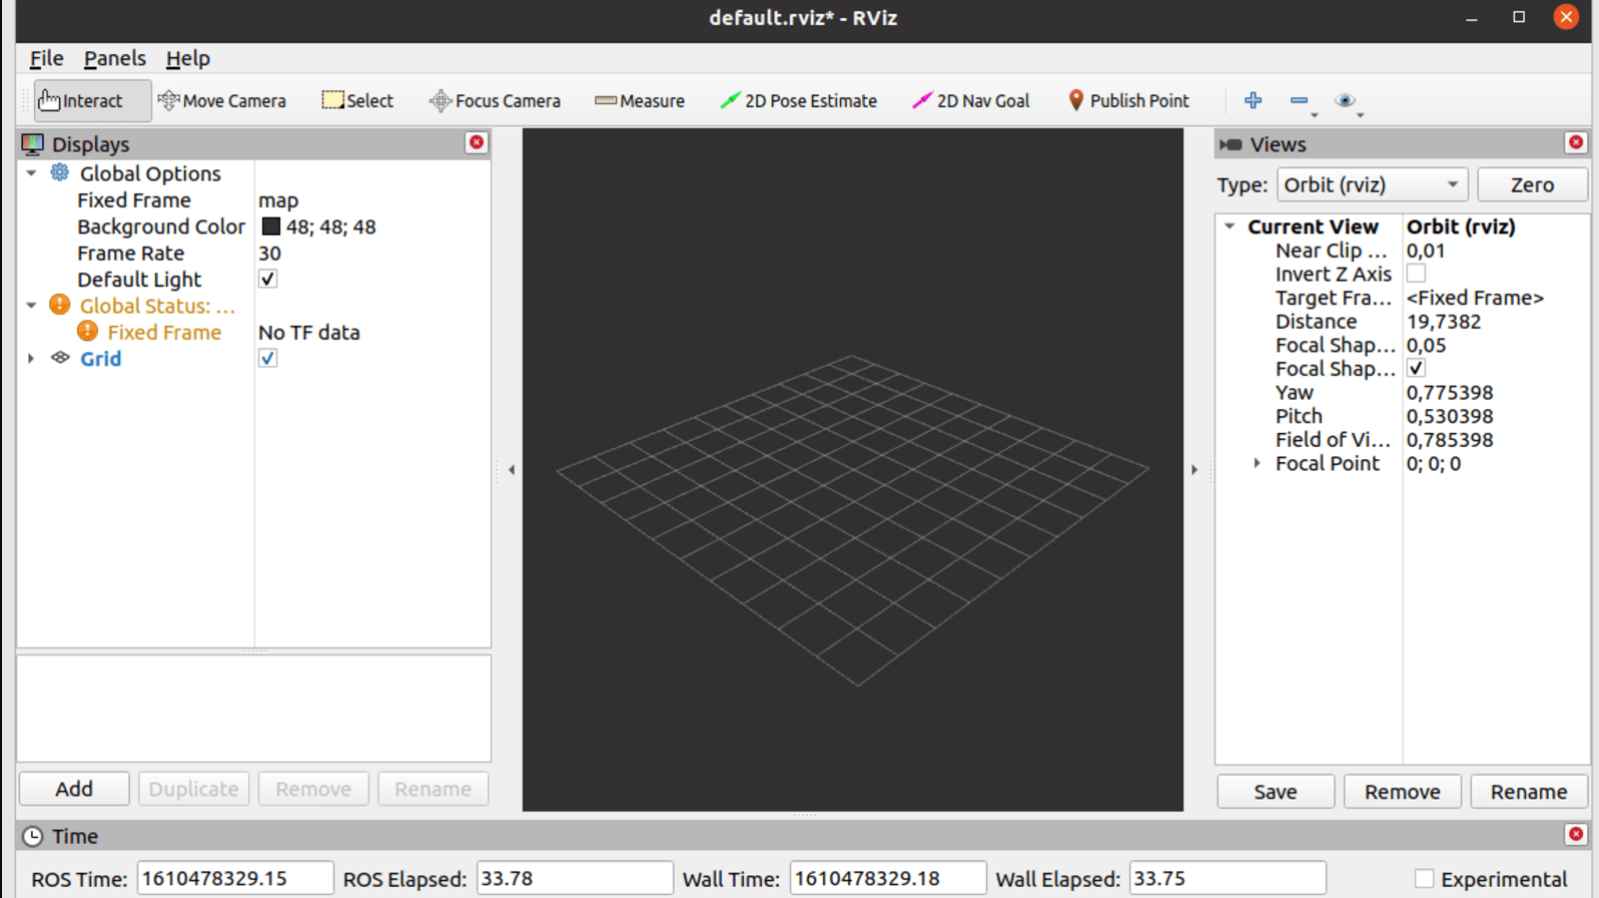

#### With 2D Pose Estimate array correct the position of the robot in order to match with its true position

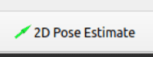

### Excersise 2
#### Localize turtlebot in your world.